<a href="https://colab.research.google.com/github/chiritotisowmyasree/CVIP/blob/main/EMAIL_SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **EMAIL_SPAM_DETECTIO**
 Email spam, also known as junk email, refers to unsolicited email messages, usually sent in bulk to a large list of recipients. Spam can be sent by real humans, but more often, it is sent by a botnet, which is a network of computers (bots or spambots) infected with malware and controlled by a single attacking party (bot herder). Apart from email, spam can also be distributed via text messages or social media.

Most people find spam annoying but consider it an inevitable side effect of using email communication. While spam is annoying -- it can choke email inboxes if not properly filtered and regularly deleted -- it can also be a threat

**Import libraries**

In [6]:
!pip install xgboost dtreeviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
import warnings
warnings.filterwarnings("ignore")

**Loading Data**

In [8]:
df = pd.read_csv("/content/emails.csv")

In [9]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Email 1556,1,1,1,0,1,0,8,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1556,Email 1557,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1557,Email 1558,1,1,1,0,1,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1558,Email 1559,14,30,15,14,21,11,260,12,7,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0


In [10]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      1
allowing      1
ff            1
dry           1
Prediction    1
Length: 3002, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Columns: 3002 entries, Email No. to Prediction
dtypes: float64(1453), int64(1548), object(1)
memory usage: 35.7+ MB


<Axes: >

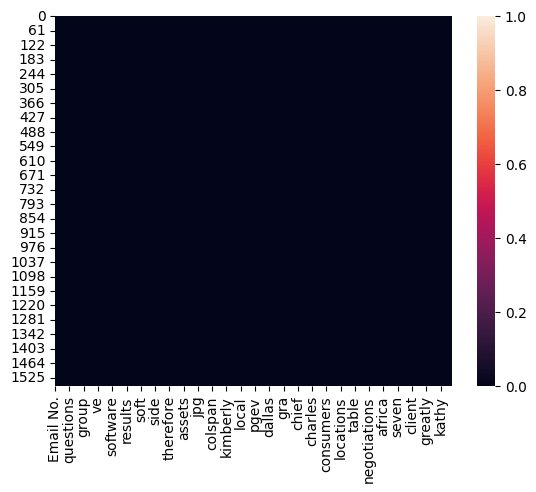

In [12]:
sns.heatmap(df.isnull())

In [13]:
df = df.iloc[:, 1:]

In [14]:
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,13,24,6,6,2,102,1,27,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,1,0,0,0,8,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,5,22,0,5,1,51,2,10,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,6,17,1,5,2,57,0,9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1,1,1,0,1,0,8,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1556,0,0,1,0,0,0,2,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1557,1,1,1,0,1,0,6,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1558,14,30,15,14,21,11,260,12,7,49,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0


In [15]:
df.nunique()

the           59
to            60
ect           71
and           39
for           34
              ..
military       2
allowing       3
ff            19
dry            2
Prediction     2
Length: 3001, dtype: int64

<Axes: xlabel='Prediction', ylabel='Density'>

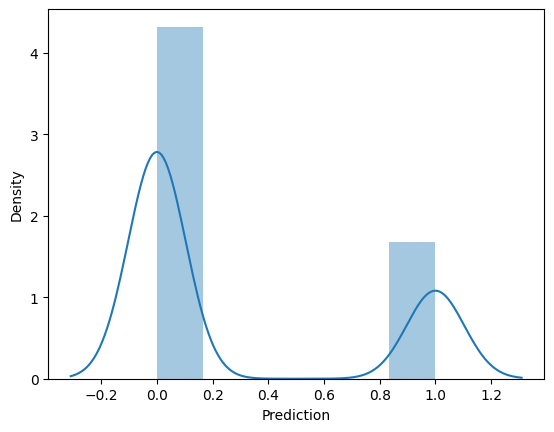

In [16]:
sns.distplot(df.Prediction)

In [17]:
x = df.iloc[:, :3000].values
x

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 8., 13., 24., ...,  0.,  1.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [14., 30., 15., ...,  0.,  3.,  0.],
       [25., 46.,  9., ..., nan, nan, nan]])

In [18]:
y = df.iloc[:, -1].values
y

array([ 0.,  0.,  0., ...,  0.,  1., nan])

**Train and Test Splitting the Data**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

**Function to Measure Performance & Show Confusion Matrix**

In [27]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")

    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Not Spam'] )
    cm_display.plot()
    plt.show()

**Gaussian Naive Bayes**

In [88]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
nan_indices = np.isnan(y_train)


In [85]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train[~nan_indices]
y_train = y_train[~nan_indices]

In [54]:
imputer = SimpleImputer(strategy='most_frequent')
model_nb = GaussianNB()
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()



In [55]:
model_nb.fit(x_train, y_train)

GaussianNB()

In [56]:
y_pred_nb = model_nb.predict(x_test)

In [70]:
print(y_pred_nb)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.

In [89]:
def my_function():
    pass
my_function()

In [110]:
def my_function(y_pred_nb):
  def perform(*y_pred_nb):
    for arg in y_pred_nb:
        print(y_pred_nb)
        perform(*y_pred_nbs)




In [124]:
display(y_pred_nb)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1.

**Multinomial Naive Bayes**

In [114]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB()

In [115]:
y_pred_mnb = model_mnb.predict(x_test)

**XGBoost Classifier**

In [117]:
xgb = XGBClassifier().fit(x_train, y_train)

In [120]:

y_pred_xgb = xgb.predict(x_test)

In [121]:
display(y_pred_xgb)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Decision Tree Visualization**

In [128]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [129]:
y_pred_dt = model_dt.predict(x_test)

In [125]:
feature_names = df.columns[0:3000]
viz = df.copy()
viz["Prediction"]=viz["Prediction"].values.astype(str)
print(viz.dtypes)
target_names = viz['Prediction'].unique().tolist()

the             int64
to              int64
ect             int64
and             int64
for             int64
               ...   
military      float64
allowing      float64
ff            float64
dry           float64
Prediction     object
Length: 3001, dtype: object


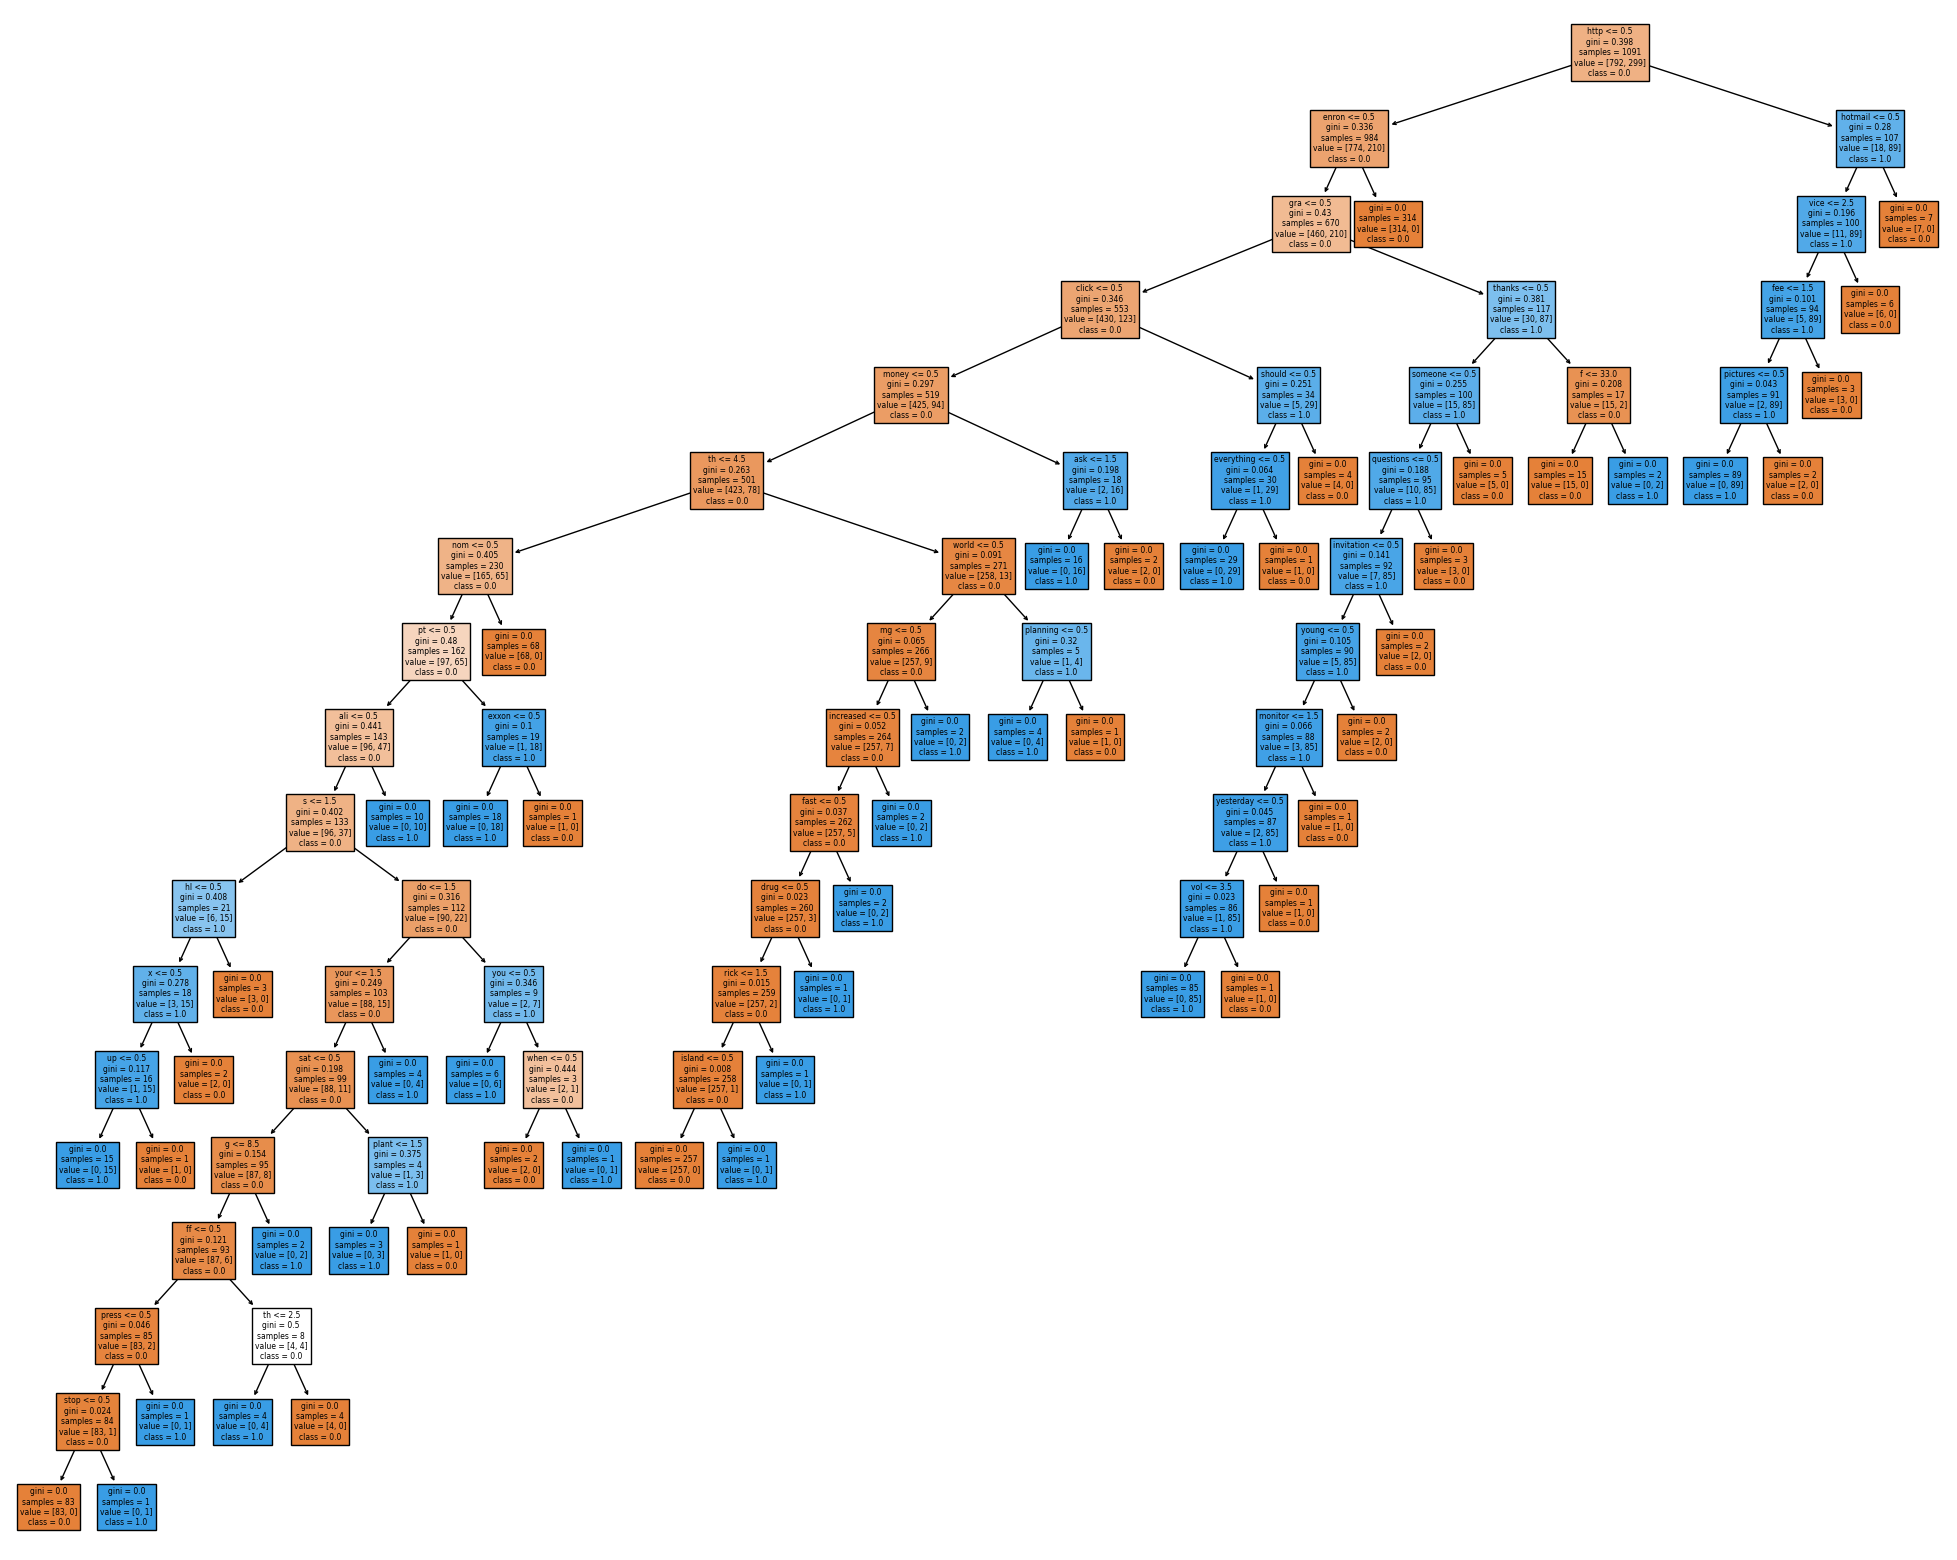

In [130]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')